In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

In [3]:
ur_files = ddf.read_csv('EnvironmentSuicide/Environment_Suicide_2014.csv', dtype = {'fips': str})
climate_2014 = ur_files.compute()
climate_2014 = climate_2014.loc[:, ~climate_2014.columns.str.contains('^Unnamed')]
climate_2014.head()

,fips,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,humidity_temp_index,PM2.5,Ozone,rurality,SuicideDeathRate
0,01001,75.264706,65.815746,9.427348,4.089503,0.194157,0.104972,0.546961,0.005525,0.0,0.157459,72.550842,65.507210,64.108920,11.7,0.0,3,3.178000
1,01003,12.427907,68.342598,NaN,5.258610,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,68.011010,8.9,2.0,4,9.994453
2,01005,94.311111,66.977961,9.317631,3.163085,0.139532,0.121212,0.413223,0.005510,0.0,0.220386,73.359889,66.823672,63.624321,11.5,0.0,6,7.293375
3,01007,162.637500,64.006027,8.989589,3.444932,0.187534,0.120548,0.400000,0.008219,0.0,0.131507,72.778657,63.527227,63.155941,11.2,0.0,2,3.178000
4,01009,243.931250,60.468767,NaN,4.017260,0.175918,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,63.350889,11.7,0.0,2,3.178000


In [4]:
climate_2014 = climate_2014[['fips', 'elevation', 'mean_temp', 'visibility', 'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail', 'thunder', 'Relative_Humidity', 'Heat_Index', 'humidity_temp_index','PM2.5', 'Ozone', 'rurality','SuicideDeathRate']]

In [5]:
climate_2014 = climate_2014.dropna()

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [7]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
X = climate_2014.iloc[:, 1:-1].values
y = climate_2014.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [9]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.16681149, 0.0320341 , 0.052885  , 0.05772453, 0.05075579,
       0.04975145, 0.04624342, 0.03421582, 0.00353824, 0.04799146,
       0.07321153, 0.03738131, 0.16920359, 0.14128671, 0.01370233,
       0.02326325])

In [10]:
len(rf.feature_importances_)

16

In [11]:
columns = climate_2014.columns

In [12]:
columns = columns[1:-1]
columns = columns.tolist()
columns

['elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'Relative_Humidity',
 'Heat_Index',
 'humidity_temp_index',
 'PM2.5',
 'Ozone',
 'rurality']

In [13]:
len(columns)

16

Text(0.5, 0, 'Random Forest Feature Importance')

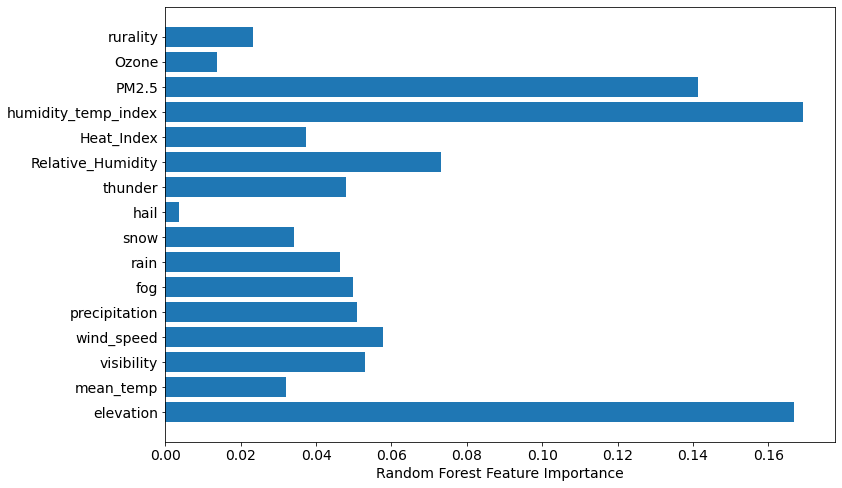

In [14]:
plt.barh(columns, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

In [15]:
sorted_idx = rf.feature_importances_.argsort()

In [16]:
sorted_idx

array([ 8, 14, 15,  1,  7, 11,  6,  9,  5,  4,  2,  3, 10, 13,  0, 12])

In [17]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

In [18]:
rf.feature_importances_[sorted_idx]

array([0.00353824, 0.01370233, 0.02326325, 0.0320341 , 0.03421582,
       0.03738131, 0.04624342, 0.04799146, 0.04975145, 0.05075579,
       0.052885  , 0.05772453, 0.07321153, 0.14128671, 0.16681149,
       0.16920359])

Text(0.5, 0, 'Random Forest Feature Importance')

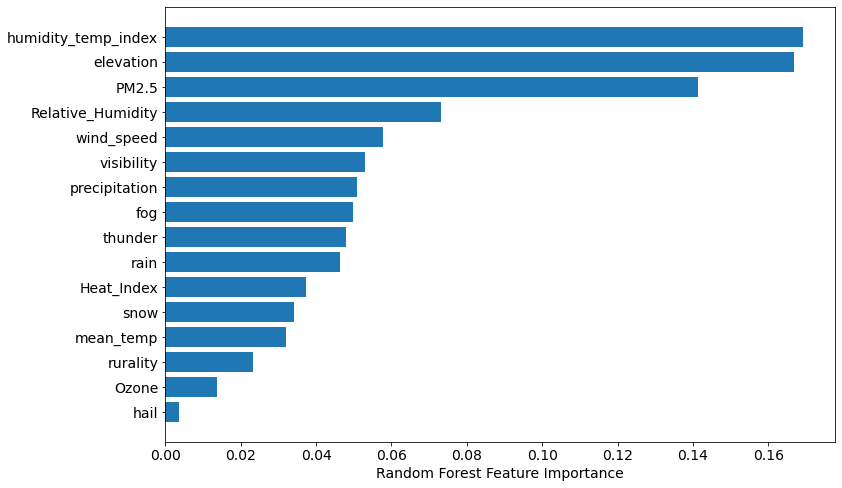

In [19]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [20]:
def correlation_matrix(df):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    # Create cmap
    cmap = sn.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sn.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

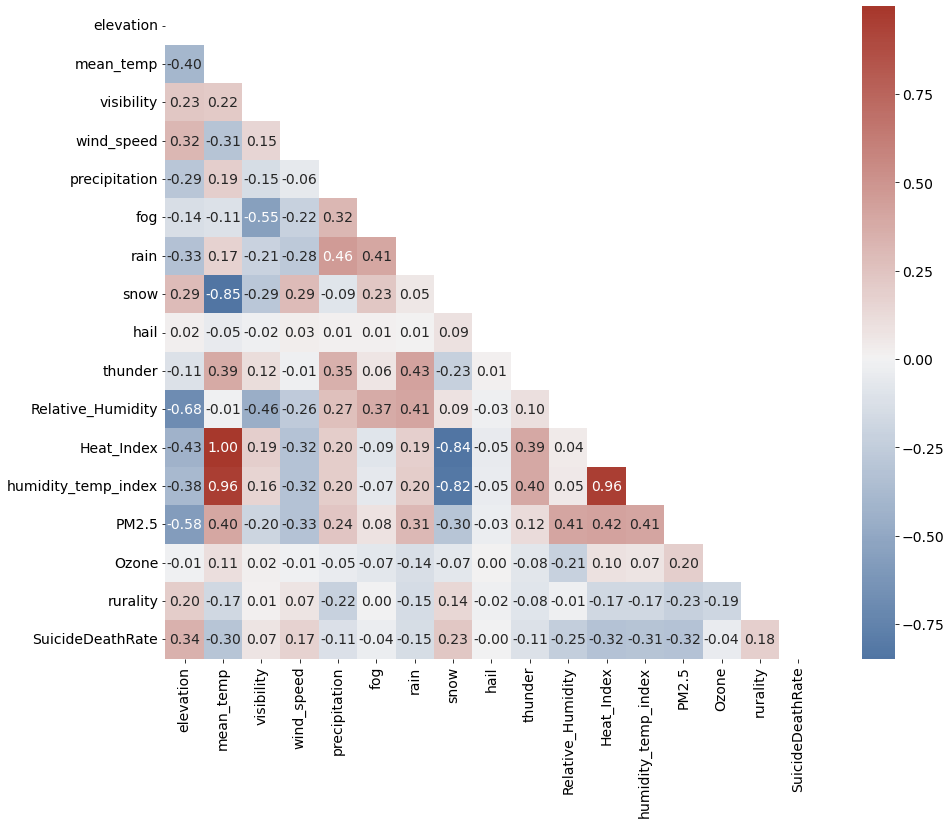

In [21]:
correlation_matrix(climate_2014)

## Find the economic feature importances

In [22]:
ur_files = ddf.read_csv('SocialEconomicSuicide/Social_Economic_Suicide_2014.csv', dtype = {'fips': str, 'per_capita_income': float})
social_2014 = ur_files.compute()
social_2014 = social_2014.loc[:, ~social_2014.columns.str.contains('^Unnamed')]
social_2014.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,31117,25760.0,0.115023,0.043210,0.007109,0.031915,0.089069,0.042553,0.000000,0.208920,0.000000,0.211268,0.018779,0.599079,0.009390,0.066667,"McPherson County, NE",NaN
1,31033,29728.0,0.135449,0.060449,0.033750,0.046326,0.121520,0.011639,0.042067,0.160992,0.052771,0.241438,0.097969,0.464679,0.011748,0.233498,"Cheyenne County, NE",12.167082
2,31047,21046.0,0.139075,0.252667,0.095486,0.038369,0.149436,0.048677,0.055155,0.139806,0.318721,0.281553,0.378723,0.495468,0.014377,0.204241,"Dawson County, NE",NaN
3,31071,21939.0,0.119645,0.055439,0.030193,0.029885,0.211325,0.008046,0.029035,0.267656,0.013369,0.226203,0.018936,0.439199,0.016888,0.158371,"Garfield County, NE",NaN
4,31125,25499.0,0.114374,0.122583,0.028157,0.048450,0.157720,0.009044,0.018132,0.195528,0.019125,0.230434,0.026725,0.576386,0.041178,0.127811,"Nance County, NE",7.289717


In [23]:
social_2014['SuicideDeathRate'].isna().sum()

191

In [24]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
social_2014 = social_2014.dropna(how = 'any')

In [25]:
social_2014.shape

(3028, 18)

In [26]:
X = social_2014.iloc[:, 1:-2].values
y = social_2014.iloc[:, -1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [28]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.04872801, 0.04372972, 0.10249154, 0.084603  , 0.04891889,
       0.07147869, 0.07090639, 0.04519973, 0.06234394, 0.06824385,
       0.05652777, 0.08490574, 0.07654236, 0.04886548, 0.08651489])

In [29]:
len(rf.feature_importances_)

15

In [30]:
columns = social_2014.columns
columns = columns[1:-2]
columns = columns.tolist()
columns

['per_capita_income',
 'percent_below_poverty',
 'percent_no_highschool_diploma',
 'percent_mobile_homes',
 'percent_no_vehicle',
 'percent_unemployed_CDC',
 'percent_overcrowding',
 'percent_multi_unit_housing',
 'percent_age_65_and_older',
 'percent_limited_english_abilities',
 'percent_age_17_and_younger',
 'percent_minorities',
 'percent_disabled',
 'percent_institutionalized_in_group_quarters',
 'percent_single_parent_households_CDC']

In [31]:
social_2014.shape

(3028, 18)

In [32]:
climate_2014.shape

(2716, 18)

In [33]:
sorted_idx = rf.feature_importances_.argsort()

In [34]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

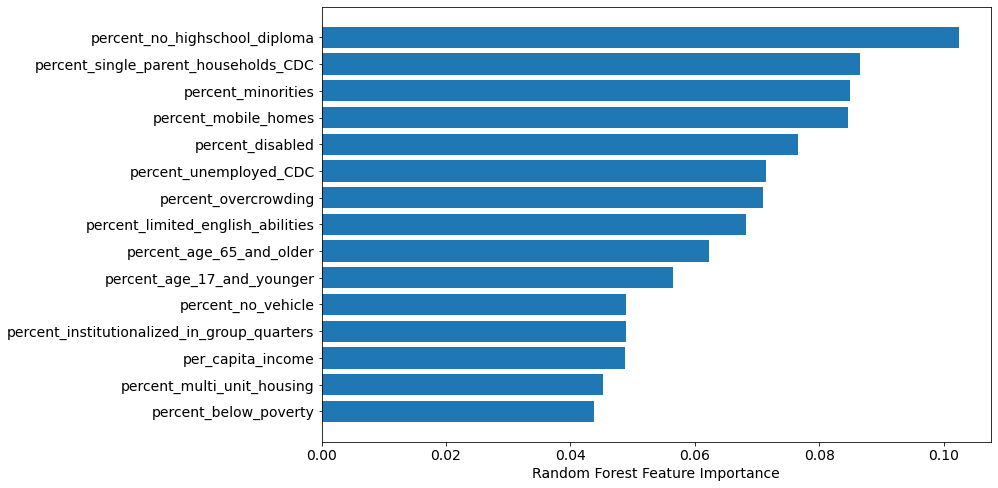

In [35]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

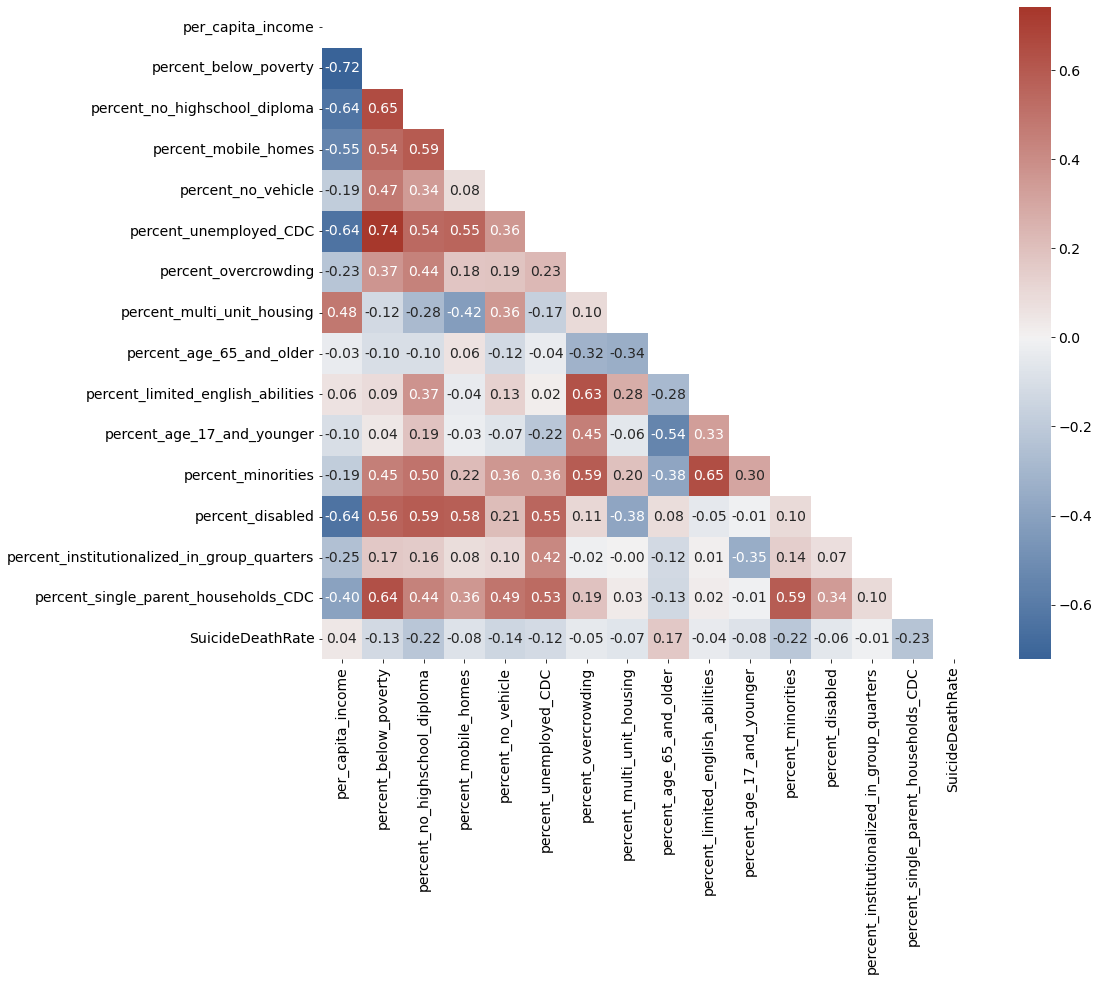

In [36]:
correlation_matrix(social_2014)

## find the rank of importances of all factors

In [37]:
df_total = social_2014.merge(climate_2014, on = ['fips', 'SuicideDeathRate'], how = 'left')
df_total = df_total.dropna(how = 'any')
df_total.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,humidity_temp_index,PM2.5,Ozone,rurality
0,31033,29728.0,0.135449,0.060449,0.033750,0.046326,0.121520,0.011639,0.042067,0.160992,...,0.287037,0.203704,0.0,0.000000,60.545211,36.497755,49.373813,5.3,0.0,6.0
1,31125,25499.0,0.114374,0.122583,0.028157,0.048450,0.157720,0.009044,0.018132,0.195528,...,0.342466,0.156164,0.0,0.126027,72.890489,46.585853,50.743500,7.8,0.0,6.0
2,31167,28682.0,0.103437,0.069940,0.071569,0.020329,0.124753,0.006055,0.014863,0.148069,...,0.304110,0.131507,0.0,0.095890,71.762231,45.840880,49.600546,8.3,0.0,5.0
3,32001,23823.0,0.168620,0.131104,0.171328,0.042837,0.267358,0.022903,0.029743,0.166879,...,0.134247,0.063014,0.0,0.021918,35.621164,51.819044,54.380478,7.4,1.0,5.0
4,32005,34090.0,0.104910,0.074717,0.057277,0.025196,0.239479,0.015735,0.028466,0.224886,...,0.158904,0.073973,0.0,0.032877,42.620223,45.775835,47.010692,7.5,4.0,5.0


In [38]:
col = df_total.columns.values

In [39]:
col

array(['fips', 'per_capita_income', 'percent_below_poverty',
       'percent_no_highschool_diploma', 'percent_mobile_homes',
       'percent_no_vehicle', 'percent_unemployed_CDC',
       'percent_overcrowding', 'percent_multi_unit_housing',
       'percent_age_65_and_older', 'percent_limited_english_abilities',
       'percent_age_17_and_younger', 'percent_minorities',
       'percent_disabled', 'percent_institutionalized_in_group_quarters',
       'percent_single_parent_households_CDC', 'county',
       'SuicideDeathRate', 'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail',
       'thunder', 'Relative_Humidity', 'Heat_Index',
       'humidity_temp_index', 'PM2.5', 'Ozone', 'rurality'], dtype=object)

In [40]:
new_col = ['fips', 'county', 'percent_below_poverty',
       'per_capita_income', 'percent_unemployed_CDC',
       'percent_no_highschool_diploma', 'percent_age_65_and_older',
       'percent_age_17_and_younger', 'percent_disabled',
       'percent_single_parent_households_CDC', 'percent_minorities',
       'percent_limited_english_abilities', 'percent_multi_unit_housing',
       'percent_mobile_homes', 'percent_overcrowding',
       'percent_no_vehicle',
       'percent_institutionalized_in_group_quarters', 
       'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'Relative_Humidity', 'Heat_Index','humidity_temp_index',
       'fog', 'rain', 'snow', 'hail', 'thunder', 'PM2.5',
       'Ozone', 'rurality','SuicideDeathRate']

In [41]:
df_total = df_total[new_col]

In [42]:
df_total.shape

(2716, 34)

In [43]:
df_total.head()

,fips,county,percent_below_poverty,per_capita_income,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,...,humidity_temp_index,fog,rain,snow,hail,thunder,PM2.5,Ozone,rurality,SuicideDeathRate
0,31033,"Cheyenne County, NE",0.135449,29728.0,0.121520,0.060449,0.160992,0.241438,0.464679,0.233498,...,49.373813,0.092593,0.287037,0.203704,0.0,0.000000,5.3,0.0,6.0,12.167082
1,31125,"Nance County, NE",0.114374,25499.0,0.157720,0.122583,0.195528,0.230434,0.576386,0.127811,...,50.743500,0.046575,0.342466,0.156164,0.0,0.126027,7.8,0.0,6.0,7.289717
2,31167,"Stanton County, NE",0.103437,28682.0,0.124753,0.069940,0.148069,0.272251,0.531806,0.221154,...,49.600546,0.082192,0.304110,0.131507,0.0,0.095890,8.3,0.0,5.0,8.057086
3,32001,"Churchill County, NV",0.168620,23823.0,0.267358,0.131104,0.166879,0.237278,0.675981,0.274428,...,54.380478,0.013699,0.134247,0.063014,0.0,0.021918,7.4,1.0,5.0,8.634833
4,32005,"Douglas County, NV",0.104910,34090.0,0.239479,0.074717,0.224886,0.190686,0.482696,0.201858,...,47.010692,0.013699,0.158904,0.073973,0.0,0.032877,7.5,4.0,5.0,6.774631


In [44]:
plt.rcParams.update({'figure.figsize': (20.0, 12.0)})
plt.rcParams.update({'font.size': 14})
X = df_total.iloc[:, 2:-1].values
y = df_total.iloc[:, -1].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [46]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.01716901, 0.01920383, 0.02135604, 0.02347868, 0.02206809,
       0.01921765, 0.03563477, 0.02967752, 0.04216544, 0.02790208,
       0.01777644, 0.02651162, 0.02017608, 0.01919373, 0.02181535,
       0.07732256, 0.01664451, 0.02929322, 0.03728198, 0.02669913,
       0.04568263, 0.01690114, 0.11481896, 0.0341849 , 0.03065095,
       0.02237651, 0.00195326, 0.02138469, 0.14408286, 0.0076628 ,
       0.00971357])

In [47]:
len(rf.feature_importances_)

31

In [48]:
columns = df_total.columns
columns = columns[2:-1]
columns = columns.tolist()
columns

['percent_below_poverty',
 'per_capita_income',
 'percent_unemployed_CDC',
 'percent_no_highschool_diploma',
 'percent_age_65_and_older',
 'percent_age_17_and_younger',
 'percent_disabled',
 'percent_single_parent_households_CDC',
 'percent_minorities',
 'percent_limited_english_abilities',
 'percent_multi_unit_housing',
 'percent_mobile_homes',
 'percent_overcrowding',
 'percent_no_vehicle',
 'percent_institutionalized_in_group_quarters',
 'elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'Relative_Humidity',
 'Heat_Index',
 'humidity_temp_index',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'PM2.5',
 'Ozone',
 'rurality']

In [49]:
sorted_idx = rf.feature_importances_.argsort()

In [50]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

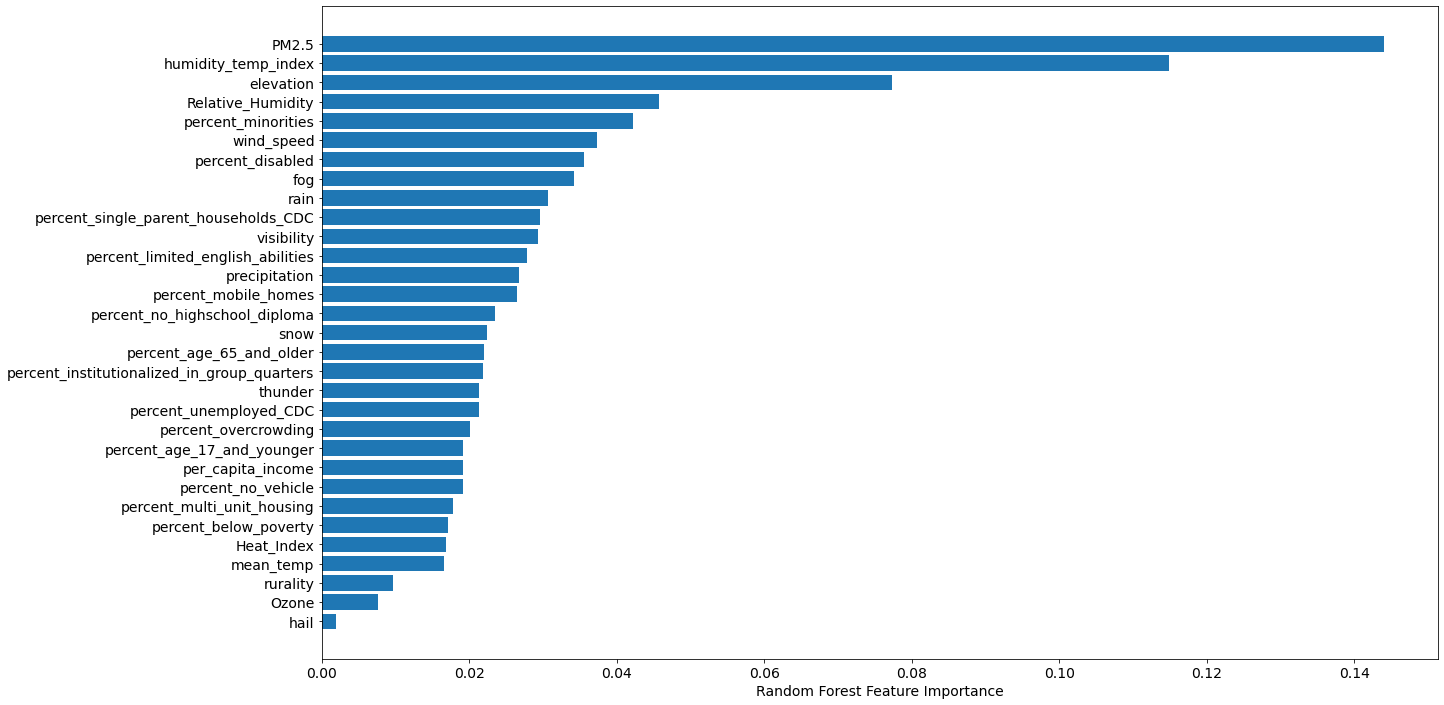

In [51]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### SHAP

In [52]:
import xgboost
import shap

In [53]:
X = climate_2014.iloc[:, 1:-1]
y = climate_2014.iloc[:, -1].array

In [54]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


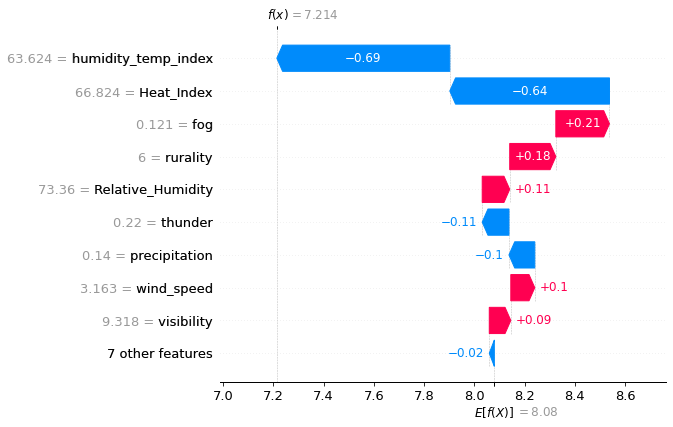

In [55]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

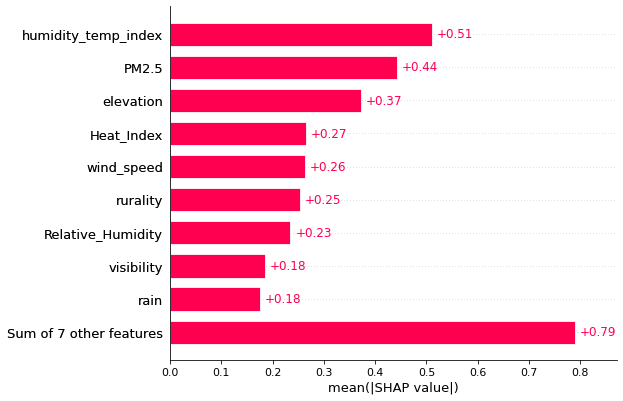

In [56]:
shap.plots.bar(shap_values)

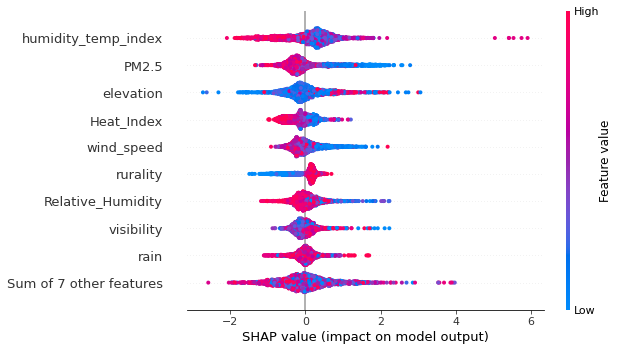

In [57]:
shap.plots.beeswarm(shap_values)

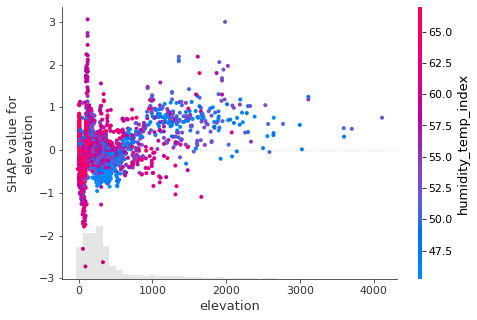

In [58]:
shap.plots.scatter(shap_values[:,"elevation"], color=shap_values)

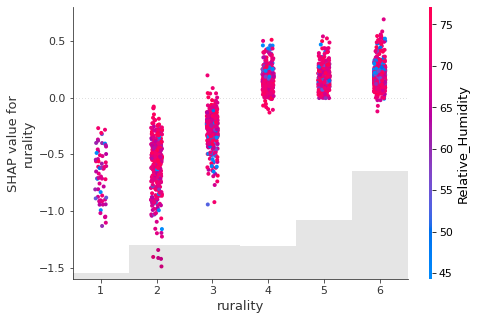

In [59]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values)

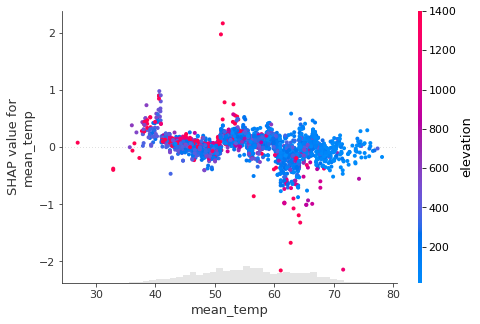

In [60]:
shap.plots.scatter(shap_values[:,"mean_temp"], color=shap_values)

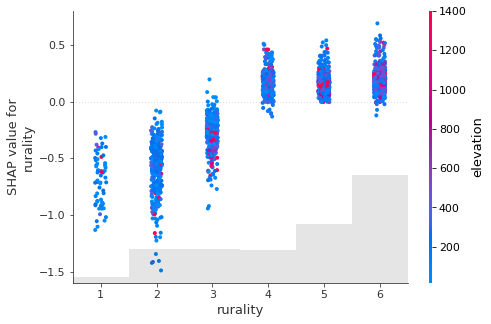

In [61]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"elevation"])

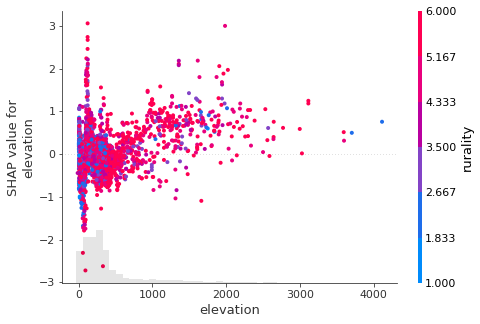

In [62]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"rurality"])

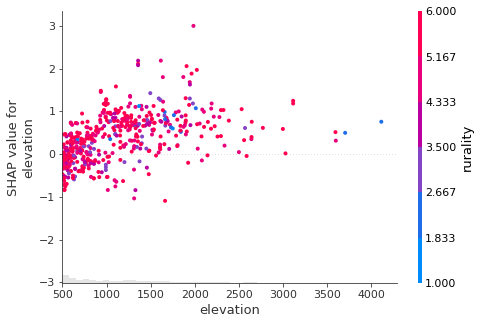

In [63]:
shap.plots.scatter(shap_values[:,"elevation"],shap_values[:,"rurality"], xmin=500)

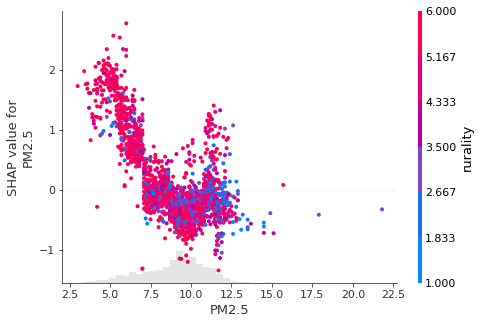

In [64]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"rurality"])

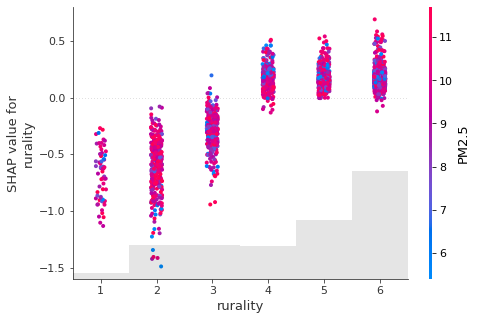

In [65]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"PM2.5"])

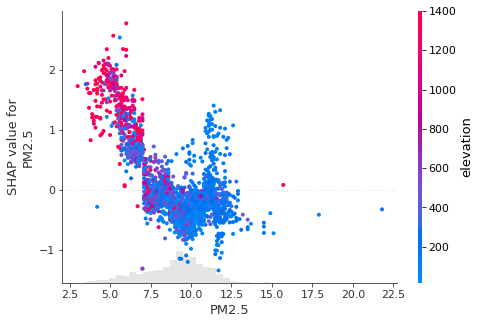

In [66]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"elevation"])

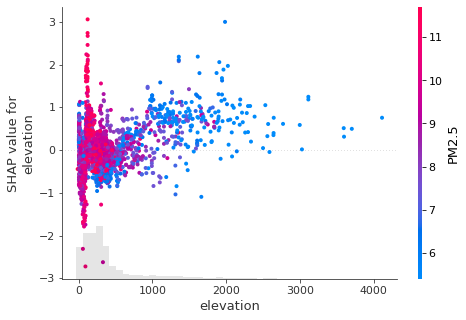

In [67]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"PM2.5"])

### social economic factors

In [68]:
social_2014.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
1,31033,29728.0,0.135449,0.060449,0.033750,0.046326,0.121520,0.011639,0.042067,0.160992,0.052771,0.241438,0.097969,0.464679,0.011748,0.233498,"Cheyenne County, NE",12.167082
4,31125,25499.0,0.114374,0.122583,0.028157,0.048450,0.157720,0.009044,0.018132,0.195528,0.019125,0.230434,0.026725,0.576386,0.041178,0.127811,"Nance County, NE",7.289717
5,31167,28682.0,0.103437,0.069940,0.071569,0.020329,0.124753,0.006055,0.014863,0.148069,0.032687,0.272251,0.070844,0.531806,0.003272,0.221154,"Stanton County, NE",8.057086
7,32001,23823.0,0.168620,0.131104,0.171328,0.042837,0.267358,0.022903,0.029743,0.166879,0.111531,0.237278,0.248614,0.675981,0.017579,0.274428,"Churchill County, NV",8.634833
8,32005,34090.0,0.104910,0.074717,0.057277,0.025196,0.239479,0.015735,0.028466,0.224886,0.087615,0.190686,0.180566,0.482696,0.006577,0.201858,"Douglas County, NV",6.774631


In [69]:
X = social_2014.iloc[:, 1:-2]
y = social_2014.iloc[:, -1].array

In [70]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


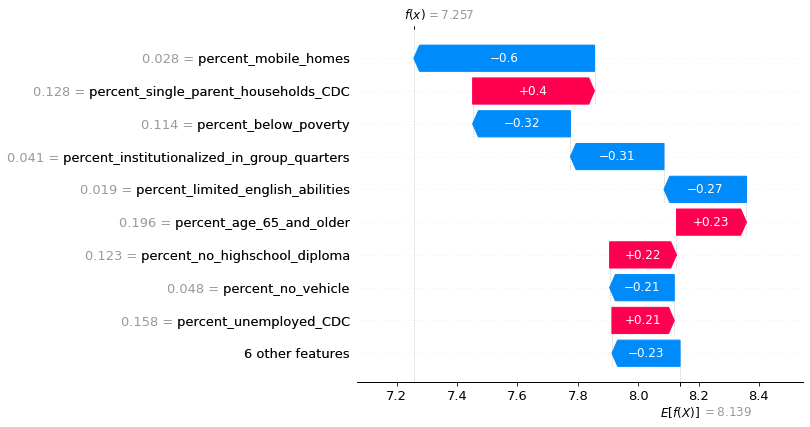

In [71]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

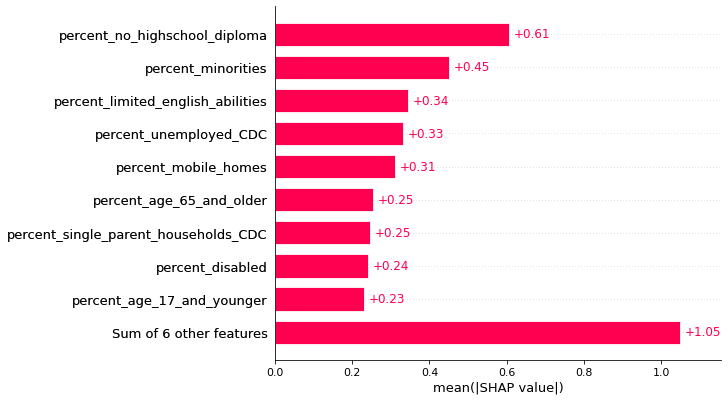

In [72]:
shap.plots.bar(shap_values)

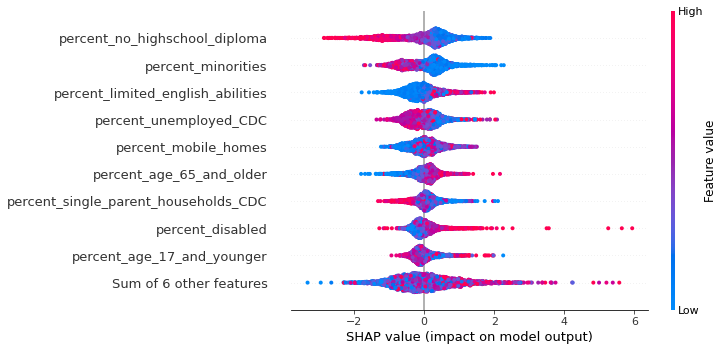

In [73]:
shap.plots.beeswarm(shap_values)

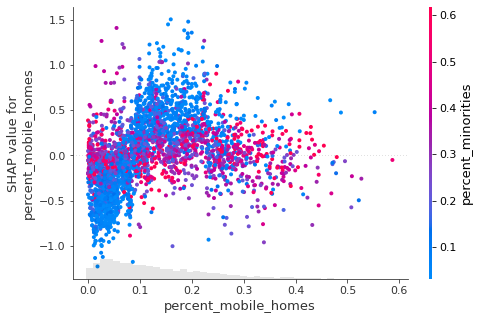

In [74]:
shap.plots.scatter(shap_values[:,"percent_mobile_homes"], color=shap_values)